In [39]:
!pip install opendatasets -q

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import time

In [41]:
od.download('https://www.kaggle.com/datasets/hassnainzaidi/ai-art-vs-human-art')

Skipping, found downloaded files in "./ai-art-vs-human-art" (use force=True to force download)


In [42]:
import os
import shutil
import random

# -----------------------------
# Configuration
# -----------------------------
SOURCE_DIR = "ai-art-vs-human-art/Art"
OUTPUT_DIR = "ai-art-vs-human-art/split_data"

TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# -----------------------------
# Create output directories
# -----------------------------
splits = ["train", "val", "test"]
classes = ["AiArtData", "RealArt"]

for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(OUTPUT_DIR, split, cls), exist_ok=True)

# -----------------------------
# Split function
# -----------------------------
def split_class(class_name):
    class_path = os.path.join(SOURCE_DIR, class_name)
    images = [f for f in os.listdir(class_path)
              if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))]

    random.shuffle(images)

    total = len(images)
    train_end = int(total * TRAIN_RATIO)
    val_end = train_end + int(total * VAL_RATIO)

    split_sets = {
        "train": images[:train_end],
        "val": images[train_end:val_end],
        "test": images[val_end:]
    }

    for split, files in split_sets.items():
        for file in files:
            src = os.path.join(class_path, file)
            dst = os.path.join(OUTPUT_DIR, split, class_name, file)
            shutil.copy2(src, dst)

    print(f"{class_name}: {total} images → "
          f"train={len(split_sets['train'])}, "
          f"val={len(split_sets['val'])}, "
          f"test={len(split_sets['test'])}")

# -----------------------------
# Run split
# -----------------------------
for cls in classes:
    split_class(cls)

print("Dataset split completed.")


AiArtData: 539 images → train=377, val=80, test=82
RealArt: 434 images → train=303, val=65, test=66
Dataset split completed.


In [43]:
train_data_dir = '/content/ai-art-vs-human-art/split_data/train'
test_data_dir = '/content/ai-art-vs-human-art/split_data/test'
val_data_dir = '/content/ai-art-vs-human-art/split_data/val'

In [44]:
import tensorflow as tf

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_data= tf.keras.utils.image_dataset_from_directory(
    val_data_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)



Found 677 files belonging to 2 classes.
Found 148 files belonging to 2 classes.
Found 145 files belonging to 2 classes.


In [45]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 224, 224, 3)
(32,)


In [46]:
class_names=train_data.class_names
class_names

['AiArtData', 'RealArt']

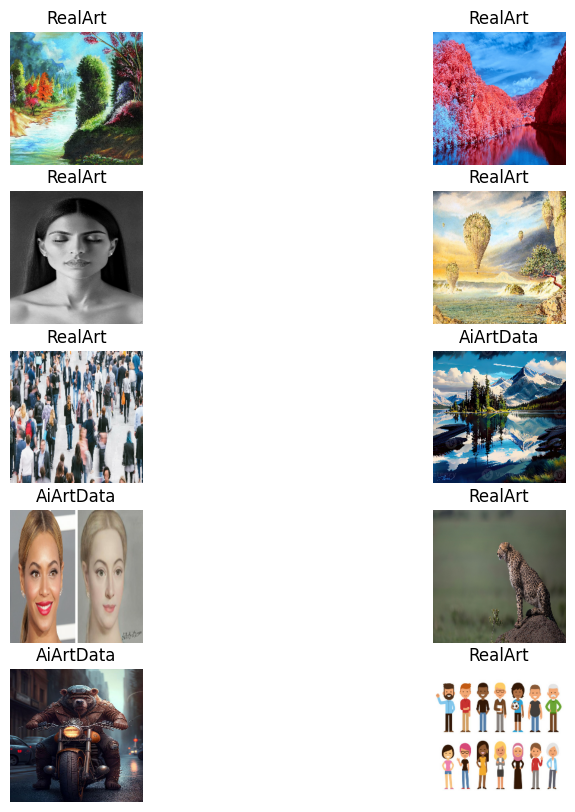

In [47]:
plt.figure(figsize=(10,10))
for image,label in train_data.take(1):
  for i in range(10):
    ax=plt.subplot(5,2,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [48]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[8.75873718e+01 1.05736610e+02 5.82959175e+01]
   [2.10334183e+02 2.15381378e+02 1.96467468e+02]
   [2.19051651e+02 2.32534439e+02 2.29267853e+02]
   ...
   [7.19688644e+01 7.77182312e+01 4.77022629e+01]
   [6.19605675e+01 6.90027237e+01 3.41275864e+01]
   [6.45036240e+01 7.61573334e+01 3.41713448e+01]]

  [[1.60010208e+02 1.65643494e+02 1.59253830e+02]
   [5.30376244e+01 4.57161980e+01 3.95733414e+01]
   [5.83131256e+01 7.43367157e+01 6.45586624e+01]
   ...
   [5.50399590e+01 6.77543106e+01 3.73256035e+01]
   [4.75848007e+01 5.85848007e+01 2.65847988e+01]
   [5.24758873e+01 6.43183594e+01 2.79255199e+01]]

  [[8.73858185e+01 1.00975739e+02 1.04172806e+02]
   [1.38348267e+02 1.57725174e+02 1.55703491e+02]
   [1.83195076e+01 4.08309860e+01 5.14413147e+01]
   ...
   [4.08348999e+01 5.38348999e+01 2.71920776e+01]
   [7.46699524e+01 8.56699524e+01 5.48843040e+01]
   [3.75613594e+01 4.65613594e+01 2.70970554e+01]]

  ...

  [[5.97977638e+01 1.08084648e+02 7.85124969e+01]
   [3

In [49]:
train_data=train_data.map(lambda x,y:(x/255,y))
val_data=val_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [50]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[2.70057246e-02 3.87704298e-02 6.57487214e-02]
   [0.00000000e+00 3.92156886e-03 3.83526087e-02]
   [0.00000000e+00 9.48879402e-03 3.88261862e-02]
   ...
   [3.23956907e-01 4.65607911e-01 2.76100338e-01]
   [2.94496268e-01 4.55254197e-01 2.40121305e-01]
   [2.16770574e-01 3.78685087e-01 1.86367810e-01]]

  [[0.00000000e+00 5.33963367e-03 1.06792673e-02]
   [2.05707233e-02 3.61335538e-02 4.81451526e-02]
   [9.32209834e-04 9.41001624e-03 3.08822803e-02]
   ...
   [1.97259203e-01 3.47819895e-01 1.41393885e-01]
   [2.23898456e-01 4.03834999e-01 1.91106617e-01]
   [2.36683249e-01 3.78461212e-01 1.73811778e-01]]

  [[3.25196376e-03 1.14029208e-02 3.73308696e-02]
   [3.29962075e-02 4.96935472e-02 5.93659431e-02]
   [2.85934517e-03 1.98468417e-02 3.44522521e-02]
   ...
   [1.15567014e-01 2.00198859e-01 9.60605964e-02]
   [4.15772617e-01 5.37896752e-01 4.80574489e-01]
   [1.49314910e-01 2.28125036e-01 9.43462774e-02]]

  ...

  [[2.99333721e-01 5.02673686e-01 7.48937190e-01]
   [2

In [51]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

In [52]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,190,145 (42.69 MB)

 Trainable params: 11,189,889 (42.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

Model Training

In [55]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

end_time = time.time()

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy: 0.5666 - loss: 0.9568 - val_accuracy: 0.5517 - val_loss: 0.6939
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.5751 - loss: 0.7261 - val_accuracy: 0.5655 - val_loss: 0.6803
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.6516 - loss: 0.6340 - val_accuracy: 0.5517 - val_loss: 0.6934
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.6054 - loss: 0.7302 - val_accuracy: 0.6207 - val_loss: 0.6496
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.6397 - loss: 0.6266 - val_accuracy: 0.5655 - val_loss: 0.6681
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.6179 - loss: 0.6394 - val_accuracy: 0.5517 - val_loss: 0.6778
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.5964 - loss: 0.6356 - val_accuracy: 0.6621 - val_loss: 0.6482
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.7167 - loss: 0.5487 - val_accuracy: 0.6000 - val

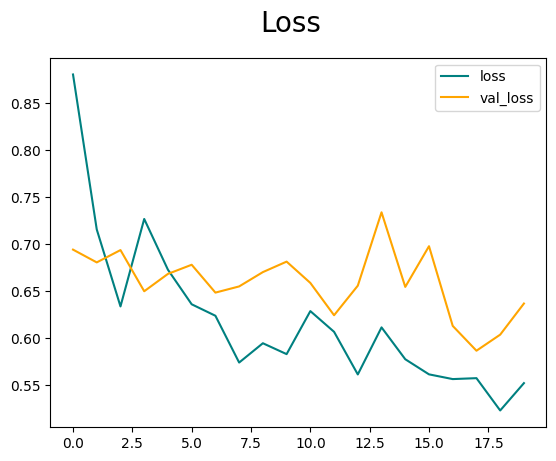

In [56]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

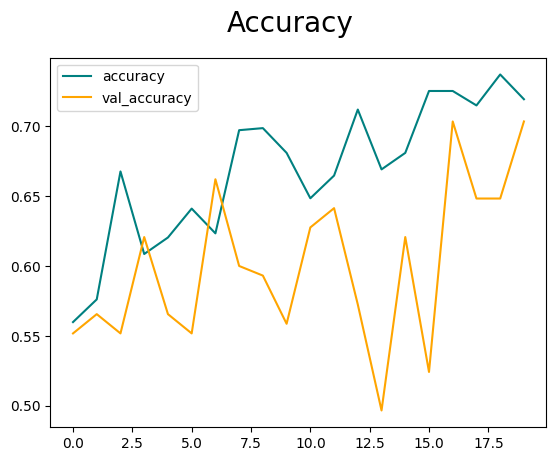

In [57]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [58]:
#model eavluation
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [59]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


In [60]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6029411554336548>

In [61]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6212121248245239>

In [62]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6486486196517944>

In [63]:
!pip install opencv-python -q

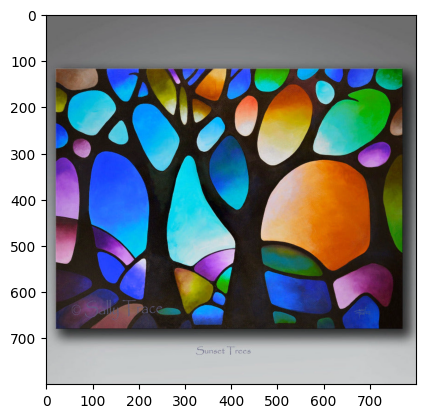

In [64]:
import cv2
img = cv2.imread('/content/ai-art-vs-human-art/split_data/test/RealArt/sunset-trees-abstract-painting-3.jpg')
plt.imshow(img)
plt.show()

In [65]:
resized_image = tf.image.resize(img,IMG_SIZE)
scaled_image = resized_image/255

In [66]:
scaled_image.shape

TensorShape([224, 224, 3])

In [67]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [68]:
yhat

array([[0.26058584]], dtype=float32)

In [69]:
class_names

['AiArtData', 'RealArt']

In [70]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

AiArtData


In [85]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(224,224,3),
                                                           weights="imagenet",
                                                           pooling='max')

for layer in pretrained_model.layers:
        layer.trainable=False

In [86]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [87]:
#model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,144,425 (80.66 MB)

 Trainable params: 282,945 (1.08 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [88]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [89]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=3,
                    validation_data=val_data)

end_time = time.time()

Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 214s 9s/step - accuracy: 0.5415 - loss: 0.7670 - val_accuracy: 0.5448 - val_loss: 0.7823
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 212s 9s/step - accuracy: 0.5977 - loss: 0.6916 - val_accuracy: 0.6966 - val_loss: 0.5689
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 206s 9s/step - accuracy: 0.7654 - loss: 0.4918 - val_accuracy: 0.6621 - val_loss: 0.5844


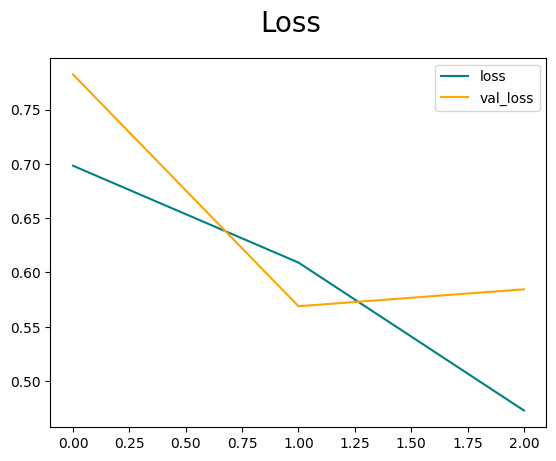

In [90]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

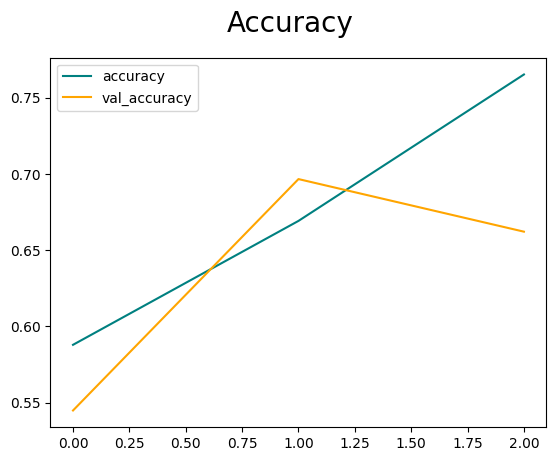

In [91]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [92]:
#model eavluation
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()


In [93]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [94]:
precision.result()

recall.result()

accuracy.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.6689189076423645>

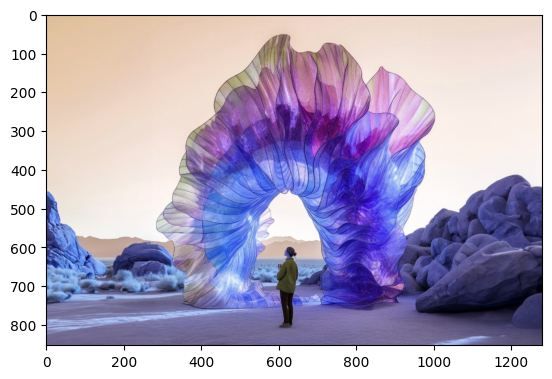

In [115]:
import cv2
img = cv2.imread('/content/ai-art-vs-human-art/split_data/test/AiArtData/top_5_midjourney_artists_2_1.jpg')
plt.imshow(img)
plt.show()

In [116]:
resized_image = tf.image.resize(img,IMG_SIZE)
scaled_image = resized_image/255


In [117]:
scaled_image.shape


TensorShape([224, 224, 3])

In [118]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


In [119]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')



RealArt
